In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np




In [ ]:

df = pd.read_csv('/content/Stops_LDS_Extract_24MonthsToEnd_202211.csv', encoding='ISO-8859-1')


# Define customer_data as a copy of the imported data
customer_df = df.copy()


 a meta data table to show characteristics of each attribute.


In [ ]:
# Creating a pandas dataframe for meta data
data = {'Attribute':['Date', 'MPS Area', 'Borough of Stop', 'Borough Code', 'Officer OCU', 
                  'Search Type', 'Subject', 'Reason for Stop', 'Outcome', 'Outcome Reason', 
                  'Apparent Age', 'Gender', 'Ethnic Appearance Code', 'EA Group', 
                  'Self-defined Ethnicity Code', 'SDE Group', 'Count'],
    'Data Type': ['Date/time', 'String', 'String', 'Integer', 'String', 
                  'String', 'String', 'int', 'String', 'String', 
                  'Integer', 'String', 'Integer', 'String', 'Integer', 
                  'String', 'Integer'],
    'Description': ['Date and time of stop and search', 'MPS Area where stop and search occurred', 
                    'Borough where stop and search occurred', 'Code of Borough where stop and search occurred', 
                    'Officers Operational Command Unit', 'Type of search', 'Name of the person searched', 
                    'Reason for the stop and search', 'Outcome of the stop and search', 'Reason for the outcome', 
                    'Apparent age of the person searched', 'Gender of the person searched', 
                    'Code for the person\'s ethnic appearance', 'Group based on ethnic appearance code', 
                    'Code for the person\'s self-defined ethnicity', 'Group based on self-defined ethnicity', 
                    'Number of people searched']}
df = pd.DataFrame(data)


# Applying CSS styles to the table
styled_table = df.style.set_table_styles([    {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
    {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ccc')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
]).set_caption("Meta Data Table")

# Displaying the styled table
display(styled_table)


,Attribute,Data Type,Description
0,Date,Date/time,Date and time of stop and search
1,MPS Area,String,MPS Area where stop and search occurred
2,Borough of Stop,String,Borough where stop and search occurred
3,Borough Code,Integer,Code of Borough where stop and search occurred
4,Officer OCU,String,Officers Operational Command Unit
5,Search Type,String,Type of search
6,Subject,String,Name of the person searched
7,Reason for Stop,int,Reason for the stop and search
8,Outcome,String,Outcome of the stop and search
9,Outcome Reason,String,Reason for the outcome


In [ ]:
metadata = {
    'Date': 'datetime',
    'Borough of Stop': 'str',
    'Reason for Stop': 'str',
    'Outcome': 'str',
    'Apparent Age': 'float',
    'Gender': 'str',
    'EA Group': 'str'
}

metadata_df = pd.DataFrame.from_dict(metadata, orient='index', columns=['Data Type'])
metadata_df.index.name = 'Attribute'
metadata_df.reset_index(inplace=True)
metadata_df['Description'] = ['Date and time of the stop',
                              'Borough in which the stop occurred',
                              'Reason given for the stop',
                              'Result of the stop (e.g. warning, summons, arrest)',
                              'Estimated age of the person stopped',
                              'Gender of the person stopped',
                              'Ethnicity and race group of the person stopped']

# Apply CSS styles to the dataframe
styled_table = metadata_df.style.set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
    ]).set_caption('Metadata Table')

# Display the table
display(styled_table)


,Attribute,Data Type,Description
0,Date,datetime,Date and time of the stop
1,Borough of Stop,str,Borough in which the stop occurred
2,Reason for Stop,str,Reason given for the stop
3,Outcome,str,"Result of the stop (e.g. warning, summons, arrest)"
4,Apparent Age,float,Estimated age of the person stopped
5,Gender,str,Gender of the person stopped
6,EA Group,str,Ethnicity and race group of the person stopped


CLEAN DATA


In [ ]:

expected_types = {'Date': datetime, 'Borough of Stop': str, 'Reason for Stop': str, 
                  'Outcome': str, 'Apparent Age': float, 'Gender': str,  'EA Group': str,
                  }
  # Remove rows that don't match the expected data types
for col, dtype in expected_types.items():
    data = customer_df.loc[customer_df[col].apply(lambda x: isinstance(x, dtype))]

# Remove rows with NaN or missing values
customer_df.dropna(inplace=True)

# Reset the index
customer_df.reset_index(drop=True, inplace=True)


visualise outcome and ethnicity in a histogram

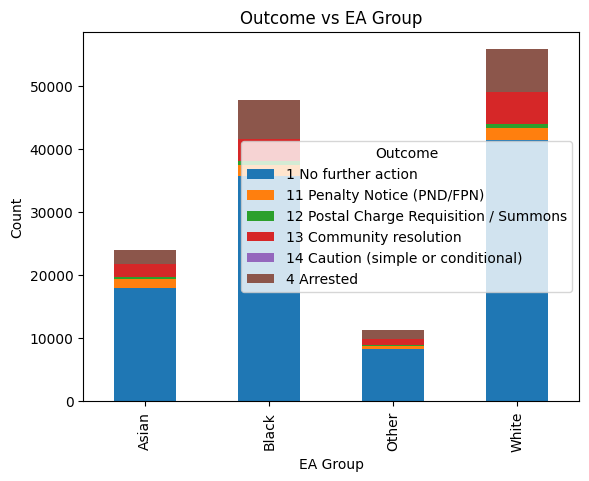

In [ ]:

df = pd.read_csv('/content/Stops_LDS_Extract_24MonthsToEnd_202211.csv', encoding='ISO-8859-1')

# Create a histogram of 'EA Group' with 'Outcome' as different colored bars
df.groupby(['EA Group', 'Outcome']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title and axis labels
plt.title('Outcome vs EA Group')
plt.xlabel('EA Group')
plt.ylabel('Count')

# Show the plot
plt.show()


reason vs etnicity

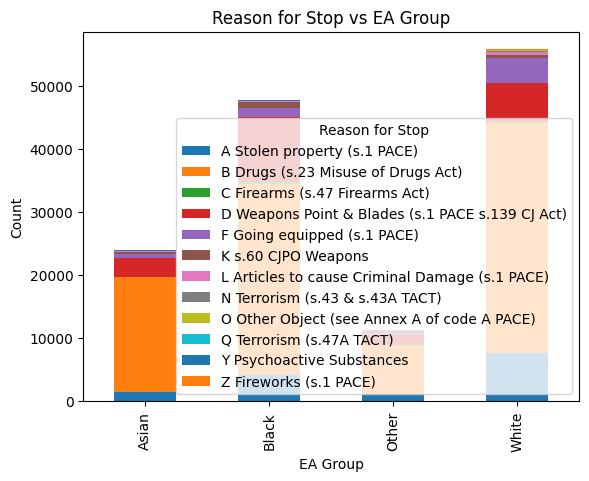

In [ ]:

# Create a histogram of 'EA Group' with 'Reason for Stop' as different colored bars
df.groupby(['EA Group', 'Reason for Stop']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title and axis labels
plt.title('Reason for Stop vs EA Group')
plt.xlabel('EA Group')
plt.ylabel('Count')

# Show the plot
plt.show()


BUILDING THE LOGISTIC REGRESSION AND SUPPORT VECTOR MACHINE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('/content/Stops_LDS_Extract_24MonthsToEnd_202211.csv', encoding='ISO-8859-1', nrows=1000)

# Encode categorical variables
le = LabelEncoder()
df['EA Group'] = le.fit_transform(df['EA Group'])
df['Gender'] = le.fit_transform(df['Gender'])

# Split the data into training and testing sets
X = df[['EA Group', 'Gender']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Build the SVM model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Print classification report
print('Logistic Regression')
print(classification_report(y_test, y_pred_lr))
print('SVM')
print(classification_report(y_test, y_pred_svm))

# Set the style of the output dataframe
styled_results_df = pd.DataFrame({
    'Logistic Regression': classification_report(y_test, y_pred_lr, output_dict=True)['weighted avg'],
    'SVM': classification_report(y_test, y_pred_svm, output_dict=True)['weighted avg'],
}).T.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
]).set_caption('Model Evaluation Results')

# Show the styled dataframe
display(styled_results_df)


Logistic Regression
                                        precision    recall  f1-score   support

                   1 No further action       0.79      1.00      0.88       157
           11 Penalty Notice (PND/FPN)       0.00      0.00      0.00         2
12 Postal Charge Requisition / Summons       0.00      0.00      0.00         3
               13 Community resolution       0.00      0.00      0.00        23
                            4 Arrested       0.00      0.00      0.00        15

                              accuracy                           0.79       200
                             macro avg       0.16      0.20      0.18       200
                          weighted avg       0.62      0.79      0.69       200

SVM
                                        precision    recall  f1-score   support

                   1 No further action       0.79      1.00      0.88       157
           11 Penalty Notice (PND/FPN)       0.00      0.00      0.00         2
12 Postal Ch

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

,precision,recall,f1-score,support
Logistic Regression,0.616225,0.785000,0.690448,200.000000
SVM,0.616225,0.785000,0.690448,200.000000


**SVM AUC CURVE**

DECISION TREE

In [ ]:
df = pd.read_csv('/content/Stops_LDS_Extract_24MonthsToEnd_202211.csv', encoding='ISO-8859-1', nrows=1000)

# Select the columns of interest
df = df[['Outcome', 'EA Group', 'Gender']]

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['EA Group', 'Gender'])

# Select the first 1000 rows of the data
subset_df = df.head(20000)

# Define X and y variables
X = subset_df.drop('Outcome', axis=1)
y = subset_df['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on test set
y_pred = dt.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1-score:", f1)

# Export the pruned tree as a .dot file
export_graphviz(dt, out_file='tree.dot', feature_names=X.columns, class_names=y.unique(), filled=True)

# Convert .dot file to .png file
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph, format='png').render('pruned_tree')

# Display the results with CSS styling
html = f"""
<style>
    table {{
        border-collapse: collapse;
        width: 100%;
    }}

    th, td {{
        text-align: left;
        padding: 8px;
    }}

    tr:nth-child(even) {{
        background-color: #f2f2f2;
    }}

    th {{
        background-color: #333;
        color: white;
    }}

    tr:hover {{
        background-color: #e5f5ff;
    }}

    td {{
        border: 1px solid black;
    }}
</style>
<table>
    <thead>
        <tr>
            <th>Metric</th>
            <th>Value</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Accuracy</td>
            <td>{accuracy:.4f}</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>{precision:.4f}</td>
        </tr>
        <tr>
            <td>Recall</td>
            <td>{recall:.4f}</td>
        </tr>
        <tr>
            <td>F1-score</td>
            <td>{f1:.4f}</td>
        </tr>
    </tbody>
</table>
"""

from IPython.display import HTML
display(HTML(html))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Accuracy: 0.785
Decision Tree Precision: 0.616225
Decision Tree Recall: 0.785
Decision Tree F1-score: 0.6904481792717087


Metric,Value
Accuracy,0.7850
Precision,0.6162
Recall,0.7850
F1-score,0.6904


CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

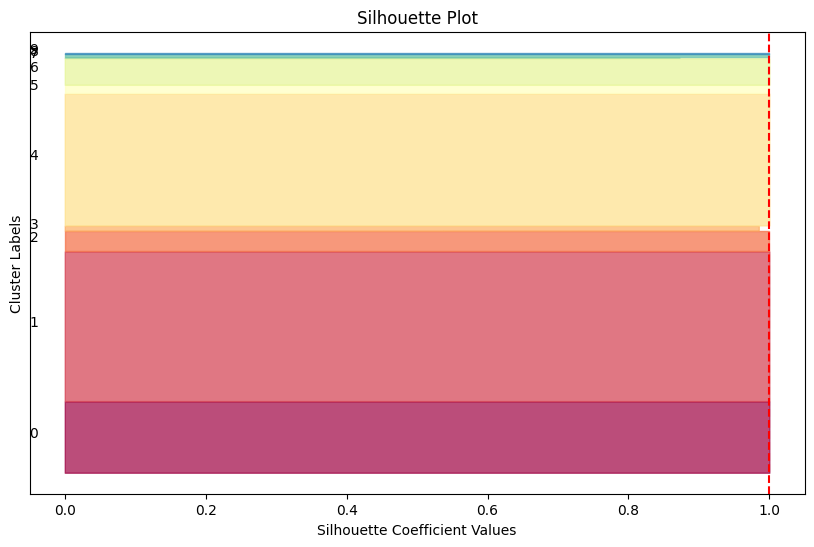

cluster  Outcome                               
0        1 No further action                       1271
         13 Community resolution                    179
         4 Arrested                                 159
         11 Penalty Notice (PND/FPN)                 72
         12 Postal Charge Requisition / Summons      28
         14 Caution (simple or conditional)           1
1        1 No further action                       2687
         4 Arrested                                 431
         13 Community resolution                    312
         11 Penalty Notice (PND/FPN)                117
         12 Postal Charge Requisition / Summons      44
         14 Caution (simple or conditional)           4
2        1 No further action                        354
         13 Community resolution                     60
         4 Arrested                                  45
         11 Penalty Notice (PND/FPN)                 14
         12 Postal Charge Requisition / Summons       6


In [ ]:
# Load the data and select the first 1000 rows
df = pd.read_csv('/content/Stops_LDS_Extract_24MonthsToEnd_202211.csv', encoding='ISO-8859-1')
df = df.iloc[:10000]

# Preprocess the data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['EA Group'] = le.fit_transform(df['EA Group'])
X = df[['Gender', 'EA Group']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
optimal_n_clusters = np.argmax(silhouette_scores) + 2

# Fit KMeans clustering model with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

# Create silhouette plot
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
fig, ax = plt.subplots(figsize=(10,6))
y_lower = 10
for i in range(optimal_n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap("Spectral")(i / optimal_n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
    
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Labels")
ax.set_title("Silhouette Plot")
plt.show()

# Analyze the results
df['cluster'] = cluster_labels
print(df.groupby('cluster')['Outcome'].value_counts())


AGE INTO BINARY

In [ ]:
 # Transform CUST_GENDER into binary and create new column 'GENDER_BINARY'
df['GENDER_BINARY'] = df['Gender'].apply(lambda x: 1 if x == 'M' else 0)

# Apply CSS styles to the dataframe
styled_table = df.head(20)[['Gender', 'GENDER_BINARY']].style.set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
    ]).set_caption("<b><font color='black'>GENDER BINARY TABLE</font></b>")

# Print the styled DataFrame with the first 20 rows
display(styled_table)


,Gender,GENDER_BINARY
0,F,0
1,M,0
2,M,0
3,M,0
4,M,0
5,M,0
6,M,0
7,M,0
8,M,0
9,M,0


BOROUGH OF STOP INTO ORDINARL

In [ ]:
# group by Borough of Stop and count occurrences
grouped_df = data.groupby('Borough of Stop').size().reset_index(name='COUNT')

# assign ordinal numbers to each borough based on their count in descending order
grouped_df['Borough of Stop ordinal'] = grouped_df['COUNT'].rank(ascending=False, method='dense')

# calculate mean, max, min, and std of the ordinal numbers
ordinal_stats = grouped_df['Borough of Stop ordinal'].describe()[['mean', 'max', 'min', 'std']]
ordinal_stats_df = pd.DataFrame(ordinal_stats).transpose()

# create a separate table for mean, max, and min
stats_table = pd.DataFrame({'Mean': [ordinal_stats['mean']],
                            'Max': [ordinal_stats['max']],
                           'std': [ordinal_stats['std']],
                            'Min': [ordinal_stats['min']]})


# create a styled table with CSS styles and print the first 20 rows
styled_table = pd.concat([grouped_df.head(20)[['Borough of Stop', 'Borough of Stop ordinal']], ordinal_stats_df], axis=1).style.set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
    ]).set_caption("Ordinal numbers for top 20 boroughs by count and std")

display(styled_table)
display(stats_table)


,Borough of Stop,Borough of Stop ordinal,mean,max,min,std
0,Barking and Dagenham,21.000000,nan,nan,nan,nan
1,Barnet,26.000000,nan,nan,nan,nan
2,Bexley,27.000000,nan,nan,nan,nan
3,Brent,8.000000,nan,nan,nan,nan
4,Bromley,14.000000,nan,nan,nan,nan
5,CO18 (City Airport),34.000000,nan,nan,nan,nan
6,CO18 (Heathrow Airport),33.000000,nan,nan,nan,nan
7,Camden,10.000000,nan,nan,nan,nan
8,City of Westminster,1.000000,nan,nan,nan,nan
9,Croydon,5.000000,nan,nan,nan,nan


,Mean,Max,std,Min
0,17.5,34.0,9.958246,1.0


ethnicity to ordinal numbers


In [ ]:
# group by Borough of Stop and count occurrences
grouped_df = data.groupby('EA Group').size().reset_index(name='COUNT')

# assign ordinal numbers to each borough based on their count in descending order
grouped_df['EA Group ordinal'] = grouped_df['COUNT'].rank(ascending=False, method='dense')

# calculate mean, max, min, and std of the ordinal numbers
ordinal_stats = grouped_df['EA Group ordinal'].describe()[['mean', 'max', 'min', 'std']]
ordinal_stats_df = pd.DataFrame(ordinal_stats).transpose()

# create a separate table for mean, max, and min
stats_table = pd.DataFrame({'Mean': [ordinal_stats['mean']],
                            'Max': [ordinal_stats['max']],
                           'std': [ordinal_stats['std']],
                            'Min': [ordinal_stats['min']]})


# create a styled table with CSS styles and print the first 20 rows
styled_table = grouped_df.head(20)[['EA Group', 'EA Group ordinal']].style.set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
    ]).set_caption("Ordinal numbers for top 20 ethnicty ")

display(styled_table)
display(stats_table)



,EA Group,EA Group ordinal
0,Asian,3.000000
1,Black,2.000000
2,Other,4.000000
3,White,1.000000


,Mean,Max,std,Min
0,2.5,4.0,1.290994,1.0


AGE into binary numbers

In [ ]:
# Create a dictionary with age categories and corresponding ordinal numbers
grouped_df = data.groupby('Apparent Age').size().reset_index(name='COUNT')

# Replace age categories with ordinal numbers in the 'Apparent Age' column
grouped_df['Apparent Age Ordinal'] = grouped_df['COUNT'].rank(ascending=False, method='dense')

# calculate mean, max, min, and std of the ordinal numbers
ordinal_stats = grouped_df['Apparent Age Ordinal'].describe()[['mean', 'max', 'min', 'std']]
ordinal_stats_df = pd.DataFrame(ordinal_stats).transpose()

# create a separate table for mean, max, and min
stats_table = pd.DataFrame({'Mean': [ordinal_stats['mean']],
                            'Max': [ordinal_stats['max']],
                           'std': [ordinal_stats['std']],
                            'Min': [ordinal_stats['min']]})


# Apply CSS styles to the dataframe
styled_table = grouped_df.head(20)[['Apparent Age', 'Apparent Age Ordinal']].style.set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
    ]).set_caption("Ordinal numbers for top 20 AGE ")

display(styled_table)
display(stats_table)




,Apparent Age,Apparent Age Ordinal
0,0.000000,46.000000
1,1.000000,63.000000
2,2.000000,69.000000
3,3.000000,70.000000
4,4.000000,72.000000
5,5.000000,72.000000
6,6.000000,72.000000
7,7.000000,76.000000
8,8.000000,76.000000
9,9.000000,78.000000


,Mean,Max,std,Min
0,44.377778,80.0,24.529541,1.0


Outcome into original

In [ ]:

# Create a dictionary with age categories and corresponding ordinal numbers
grouped_df = data.groupby('Outcome').size().reset_index(name='COUNT')

# Replace age categories with ordinal numbers in the 'Outcome' column
grouped_df['Outcome Ordinal'] = grouped_df['COUNT'].rank(ascending=False, method='dense')
# calculate mean, max, min, and std of the ordinal numbers
ordinal_stats = grouped_df['Outcome Ordinal'].describe()[['mean', 'max', 'min', 'std']]
ordinal_stats_df = pd.DataFrame(ordinal_stats).transpose()

# create a separate table for mean, max, and min
stats_table = pd.DataFrame({'mean': [ordinal_stats['mean']],
                            'Max': [ordinal_stats['max']],
                           'std': [ordinal_stats['std']],
                            'Min': [ordinal_stats['min']]})

# Add a new column 'Apparent Age Category' with original age categories
grouped_df['Outcome Category'] = grouped_df['Outcome']

# Apply CSS styles to the dataframe
styled_table = grouped_df.head(20)[['Outcome Category', 'Outcome Ordinal']].style.set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#333'), ('color', 'white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#e5f5ff')]}
    ]).set_caption("Ordinal numbers for top 20 AGE ")

display(styled_table)
display(stats_table)




,Outcome Category,Outcome Ordinal
0,1 No further action,1.000000
1,11 Penalty Notice (PND/FPN),4.000000
2,12 Postal Charge Requisition / Summons,5.000000
3,13 Community resolution,3.000000
4,14 Caution (simple or conditional),6.000000
5,4 Arrested,2.000000


,mean,Max,std,Min
0,3.5,6.0,1.870829,1.0


In [ ]:
print(data.columns)


Index(['Date', 'MPS Area', 'Borough of Stop', 'Borough Code', 'Officer OCU',
       'Search Type', 'Subject', 'Reason for Stop', 'Outcome',
       'Outcome Reason', 'Apparent Age', 'Gender', 'Ethnic Appearance Code',
       'EA Group', 'Self-defined Ethnicity Code', 'SDE Group', 'Count'],
      dtype='object')
